In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.datasets import reuters
import numpy as np
import matplotlib.pyplot as plt

In [2]:
(X_train, y_train), (X_test, y_test) = reuters.load_data(num_words=1000, test_split=0.2)

2121728/2110848 [==============================] - 0s 0us/step


In [3]:
category = np.max(y_train) +1 
print(category, '카테고리')
print(len(X_train), '학습용 뉴스 기사')
print(len(X_test), '테스트용 뉴스 기사')
print(X_train[0])

46 카테고리
8982 학습용 뉴스 기사
2246 테스트용 뉴스 기사
[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 2, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 2, 2, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 2, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]


In [4]:
X_train = sequence.pad_sequences(X_train, maxlen=100)
X_test = sequence.pad_sequences(X_test, maxlen=100)

In [5]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [6]:
model = Sequential()
model.add(Embedding(1000, 100))
model.add(LSTM(100, activation='tanh'))
model.add(Dense(46, activation = 'softmax'))

In [7]:
model.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics=['accuracy'])

In [8]:
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=5)

In [9]:
history = model.fit(X_train, y_train, batch_size=20, epochs=200,
                    validation_data=(X_test, y_test), callbacks=[early_stopping_callback])

Epoch 1/200
450/450 [==============================] - 12s 10ms/step - loss: 2.1848 - accuracy: 0.4488 - val_loss: 2.1128 - val_accuracy: 0.4768
Epoch 2/200
450/450 [==============================] - 4s 9ms/step - loss: 1.7792 - accuracy: 0.5472 - val_loss: 1.7962 - val_accuracy: 0.5641
Epoch 3/200
450/450 [==============================] - 4s 9ms/step - loss: 1.6074 - accuracy: 0.5914 - val_loss: 1.5830 - val_accuracy: 0.6055
Epoch 4/200
450/450 [==============================] - 4s 9ms/step - loss: 1.4386 - accuracy: 0.6343 - val_loss: 1.5670 - val_accuracy: 0.6011
Epoch 5/200
450/450 [==============================] - 5s 12ms/step - loss: 1.4183 - accuracy: 0.6397 - val_loss: 1.5301 - val_accuracy: 0.6046
Epoch 6/200
450/450 [==============================] - 4s 9ms/step - loss: 1.3010 - accuracy: 0.6687 - val_loss: 1.3641 - val_accuracy: 0.6496
Epoch 7/200
450/450 [==============================] - 5s 12ms/step - loss: 1.2007 - accuracy: 0.6935 - val_loss: 1.3158 - val_accuracy: 0.

In [12]:
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, y_test)[1]))

71/71 [==============================] - 0s 6ms/step - loss: 1.3697 - accuracy: 0.7262

 Test Accuracy: 0.7262


In [14]:
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

<function matplotlib.pyplot.show>

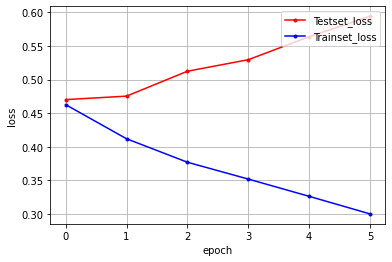

In [18]:
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c='red', label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c='blue', label= 'Trainset_loss')

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show

##LSTM과 CNN을 조합해 영화리뷰 분류하기

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, Activation, Embedding, Conv1D, MaxPooling1D
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.callbacks import EarlyStopping

import numpy as np
import matplotlib.pyplot as plt

In [20]:
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=5000)

X_train = sequence.pad_sequences(X_train, maxlen=500)
X_test = sequence.pad_sequences(X_test, maxlen=500)

17473536/17464789 [==============================] - 0s 0us/step


In [21]:
model = Sequential()
model.add(Embedding(5000,100))
model.add(Dropout(0.5))
model.add(Conv1D(64, 5, padding='valid', activation='relu', strides=1))
model.add(MaxPooling1D(pool_size=4))
model.add(LSTM(55))
model.add(Dense(1))
model.add(Activation('sigmoid'))

In [22]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [23]:
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=3)

In [24]:
history = model.fit(X_train, y_train, batch_size=40, epochs=100, validation_split=0.25, callbacks=[early_stopping_callback])

Epoch 1/100
469/469 [==============================] - 17s 16ms/step - loss: 0.3997 - accuracy: 0.8018 - val_loss: 0.2802 - val_accuracy: 0.8878
Epoch 2/100
469/469 [==============================] - 7s 14ms/step - loss: 0.2330 - accuracy: 0.9116 - val_loss: 0.2690 - val_accuracy: 0.8870
Epoch 3/100
469/469 [==============================] - 7s 15ms/step - loss: 0.1839 - accuracy: 0.9302 - val_loss: 0.2714 - val_accuracy: 0.8915
Epoch 4/100
469/469 [==============================] - 7s 15ms/step - loss: 0.1476 - accuracy: 0.9457 - val_loss: 0.2869 - val_accuracy: 0.8856
Epoch 5/100
469/469 [==============================] - 8s 16ms/step - loss: 0.1148 - accuracy: 0.9605 - val_loss: 0.3067 - val_accuracy: 0.8797


In [25]:
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, y_test)[1]))

782/782 [==============================] - 5s 6ms/step - loss: 0.3378 - accuracy: 0.8683

 Test Accuracy: 0.8683


In [26]:
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

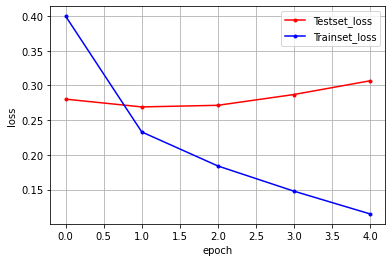

In [28]:
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c='red', label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c='blue', label='Trainset_loss')

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

## 어텐션을 사용한 신경망

In [33]:
!pip install attention

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Embedding, LSTM, Conv1D, MaxPooling1D
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.callbacks import EarlyStopping
from attention import Attention

import numpy as np
import matplotlib.pyplot as plt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [34]:
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=5000)

X_train = sequence.pad_sequences(X_train, maxlen=500)
X_test = sequence.pad_sequences(X_test, maxlen=500)

In [36]:
model = Sequential()
model.add(Embedding(5000,500))
model.add(Dropout(0.5))
model.add(LSTM(64, return_sequences=True))
model.add(Attention())
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

In [37]:
model.compile(loss='binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])

In [38]:
early_stopping_callback = EarlyStopping(monitor= 'val_loss', patience=3)

In [40]:
history = model.fit(X_train, y_train, batch_size =40, epochs=100, validation_data=(X_test, y_test), callbacks= [early_stopping_callback])

Epoch 1/100
625/625 [==============================] - 26s 38ms/step - loss: 0.3761 - accuracy: 0.8279 - val_loss: 0.2717 - val_accuracy: 0.8850
Epoch 2/100
625/625 [==============================] - 23s 37ms/step - loss: 0.2217 - accuracy: 0.9104 - val_loss: 0.2715 - val_accuracy: 0.8922
Epoch 3/100
625/625 [==============================] - 23s 37ms/step - loss: 0.1583 - accuracy: 0.9381 - val_loss: 0.2915 - val_accuracy: 0.8895
Epoch 4/100
625/625 [==============================] - 22s 36ms/step - loss: 0.1135 - accuracy: 0.9568 - val_loss: 0.3542 - val_accuracy: 0.8815
Epoch 5/100
625/625 [==============================] - 23s 36ms/step - loss: 0.0836 - accuracy: 0.9683 - val_loss: 0.3572 - val_accuracy: 0.8784


In [41]:
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, y_test)[1]))

782/782 [==============================] - 10s 12ms/step - loss: 0.3572 - accuracy: 0.8784

 Test Accuracy: 0.8784


In [42]:
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

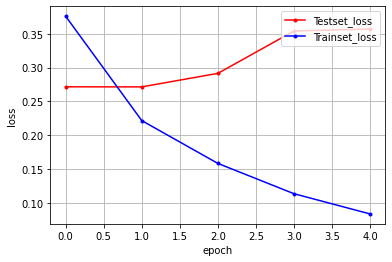

In [43]:
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c='red', label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c='blue', label='Trainset_loss')

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()